In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# 🐼 Exploratory Analysis - Coding Challenge
---

#### Read in the ratings and movies tables

- Download the data from https://grouplens.org/datasets/movielens/
- recommended for education and development
- Take the **small** dataset: `ml-latest-small.zip`
- Extract the tables from the `.zip` archive

- ⭐ Advanced Challenge: Try out to process the larger datasets



In [5]:
ratings = pd.read_csv("web_app/ratings.csv")
movies = pd.read_csv("web_app/movies.csv")

In [6]:
movies.loc[movies['movieId'] == 224]

,movieId,title,genres
191,224,Don Juan DeMarco (1995),Comedy|Drama|Romance


In [7]:
movies.loc[movies['title'].isna()]

,movieId,title,genres


In [8]:
movies.loc[movies['title'].str.contains('Cars')]

,movieId,title,genres
3556,4867,Riding in Cars with Boys (2001),Comedy|Drama
6212,45517,Cars (2006),Animation|Children|Comedy
7639,87876,Cars 2 (2011),Adventure|Animation|Children|Comedy|IMAX
9509,170957,Cars 3 (2017),Adventure|Animation|Comedy


In [9]:
rating = ratings.groupby('movieId')['rating'].mean()[548]

In [10]:
round(rating)

3

---
## Ratings table

#### How many unique users and movies are in the dataset?

In [11]:
ratings['userId'].nunique()

610

#### What is the average rating

In [12]:
ratings['rating'].mean()

3.501556983616962

#### which rating appears the most?

In [13]:
ratings['rating'].mode()

0    4.0
dtype: float64

#### What is the percentage of 5 star ratings?

- ⭐**Bonus**: How are the ratings distributed? Derive a relative frequency table for the `rating` column!

In [14]:
relative_frequencies = ratings['rating'].value_counts(normalize=True)

In [15]:
relative_frequencies = pd.DataFrame(relative_frequencies)

In [16]:
relative_frequencies

,rating
4.0,0.265957
3.0,0.198808
5.0,0.131015
3.5,0.130271
4.5,0.084801
2.0,0.074884
2.5,0.055040
1.0,0.027877
1.5,0.017762
0.5,0.013586


In [17]:
print("Percentage of 5 star ratings: ", round(len(ratings.loc[ratings['rating'] == 5]) / len(ratings) * 100, ndigits=3), "%")

Percentage of 5 star ratings:  13.101 %


---
#### Count the number of ratings *per* user

- Hint: Use a `groupby` statement and the `count` method

In [18]:
ratings.groupby('userId')['rating'].count()

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

- How many users have rated more than 20 movies?

In [19]:
print(len(ratings.groupby('userId').count().loc[ratings['movieId'] > 20]), "users have rated more than 20 movies")

593 users have rated more than 20 movies


- How many movies rated the user with the most/ least ratings?

In [20]:
print("The user who has rated the most movies rated" , ratings.groupby('userId')['rating'].count().sort_values().max(), "movies")

The user who has rated the most movies rated 2698 movies


In [21]:
print("The user who has rated the least movies rated" , ratings.groupby('userId')['rating'].count().sort_values().min(), "movies")

The user who has rated the least movies rated 20 movies


-  What is the *median* number of ratings?

In [22]:
print("The median number of ratings is:", ratings.groupby('userId')['rating'].count().median())

The median number of ratings is: 70.5


- Draw a histogram or density plot of the distribution of the number of ratings per user! 

    - How would you characterize the distribution?
    - Hint: `sns.histplot()`

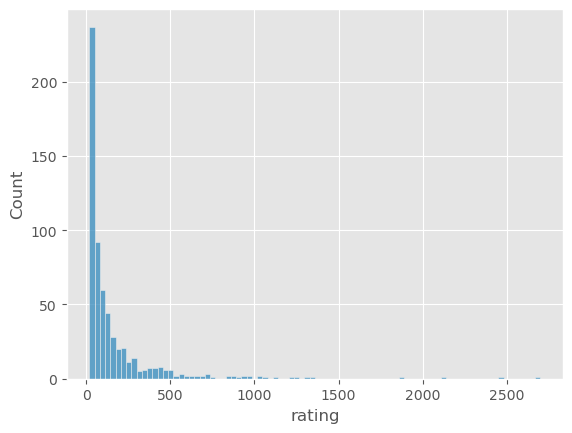

In [23]:
sns.histplot(data=ratings.groupby('userId')['rating'].count())

---
#### Calculate the average rating *per user*

- Hint: use a `groupby` statement, select the `rating` column and apply the `mean` method

In [24]:
ratings.groupby('userId')['rating'].mean()

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64

- Which user gave the worst ratings on average, which user gave the best ratings?

In [25]:
ratings.groupby('userId')['rating'].mean().sort_values()

userId
442    1.275000
139    2.144330
508    2.145833
153    2.217877
567    2.245455
         ...   
30     4.735294
25     4.807692
515    4.846154
251    4.869565
53     5.000000
Name: rating, Length: 610, dtype: float64

- ⭐**Bonus**: Use your previous results and filter out users that have rated less than 20 movies! Do your results change?

In [26]:
ratings.groupby('userId')['rating'].mean().sort_values().loc[ratings['movieId'] > 20]

userId
442    1.275000
139    2.144330
508    2.145833
153    2.217877
311    2.339286
         ...   
30     4.735294
25     4.807692
515    4.846154
251    4.869565
53     5.000000
Name: rating, Length: 593, dtype: float64

- Plot the distribution of average ratings! How would you characterize the distribution?

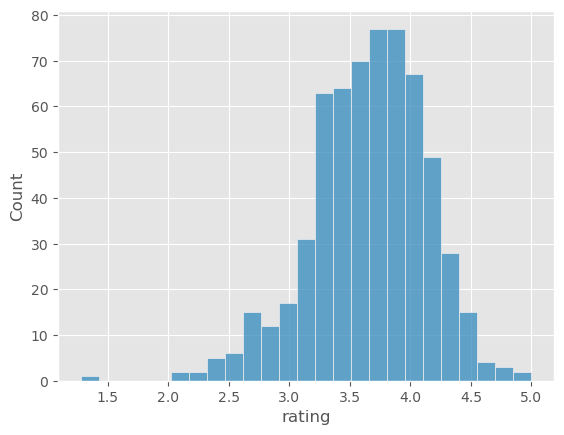

In [27]:
sns.histplot(ratings.groupby('userId')['rating'].mean().sort_values())

- ⭐**Bonus**: Are users who have given more ratings also stricter in their ratings?

    - Derive the correlation between the average rating and the number of ratings per user!
    - Draw a scatterplot of the user averages and number of ratings
    - Only consider users that have rated at least 10 movies

In [28]:
average = pd.DataFrame(ratings.groupby('userId')['rating'].mean().sort_index())

In [29]:
count = pd.DataFrame(ratings.groupby('userId')['rating'].count())

In [30]:
average['count'] = count

In [31]:
average.corr()

,rating,count
rating,1.000000,-0.198997
count,-0.198997,1.000000


--- 
## Movies table

#### Are there any duplicated titles?

Hint: use the `duplicated` method

In [32]:
movies.duplicated().sum()

0

#### Are there any `movieId`s listed in the movies table that are not in the `ratings` table?

- Hint: Use the `isin()` method

In [33]:
ratings['movieId'].isin(movies['movieId']).value_counts()

True    100836
Name: movieId, dtype: int64

#### ⭐ Bonus: Extract the year out of the title column

- Use the `pandas.Series.str.extract()` method with a regular expression
- Hint: check out the [following regular expression](https://regex101.com/r/dJkxR0/1)

In [34]:
movies.loc[movies['title'].isna()]

,movieId,title,genres


In [35]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [36]:
movies['year'] = movies['title'].str.extract('\(([0-9]{4})\)')

In [37]:
movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


In [38]:
titles = movies['title'].str.partition(' (', True)

In [39]:
movies['title'] = titles[0]

In [40]:
movies[movies['title'].str.fullmatch('Ted')]['movieId'].values[0]

95441

In [41]:
movies.loc[movies['title'].isna()]

,movieId,title,genres,year


In [42]:
movie = movies[movies['title'].str.contains('Up')]['title'].values

In [43]:
movie

array(['Once Upon a Time... When We Were Colored',
       'Up Close and Personal', 'Air Up There, The',
       'Englishman Who Went Up a Hill But Came Down a Mountain, The',
       'Denise Calls Up', 'Bringing Up Baby', 'Tie Me Up! Tie Me Down!',
       "Cheech and Chong's Up in Smoke", 'Once Upon a Time in the West',
       'Once Upon a Time in America', 'Pump Up the Volume',
       'Honey, I Blew Up the Kid', '52 Pick-Up', '42 Up', 'Hanging Up',
       'Up at the Villa', 'Blow-Up', '3 Ninjas Knuckle Up',
       'Dancer Upstairs, The', "What's Up, Doc?",
       "What's Up, Tiger Lily?", 'Uptown Girls',
       'Once Upon a Time in the Midlands', 'Once Upon a Time in Mexico',
       'Once Upon a Time in China', 'Once Upon a Time in China II',
       'Once Upon a Time in China III',
       'Lagaan: Once Upon a Time in India', '28 Up', '35 Up',
       'Upside of Anger, The', 'Break-Up, The', 'Step Up',
       'Shut Up & Sing', '49 Up', 'Seven Up!', 'Wake Up, Ron Burgundy',
       '21 Up',

In [44]:
movies[movies['title'].str.match("Grumpy Old Men")]

,movieId,title,genres,year
2581,3450,Grumpy Old Men,Comedy,1993


In [45]:
movies[movies['title'] == 'Grumpier Old Men']

,movieId,title,genres,year
2,3,Grumpier Old Men,Comedy|Romance,1995


#### ⭐ Bonus: Split the genre column into a separate genre table

1. Use the `pandas.Series.str.split` method
2. Then use the `pandas.Series.explode` method to clean up the list entries
3. Which `movieId` has the most genres assigned?

In [46]:
genres = movies['genres'].str.split('|').explode()

In [47]:
genres = pd.DataFrame(genres)

In [48]:
genres['movieId'] = movies['movieId']

In [49]:
genres.set_index('movieId', inplace=True, drop=True)

In [50]:
genres

,genres
movieId,
1,Adventure
1,Animation
1,Children
1,Comedy
1,Fantasy
...,...
193583,Fantasy
193585,Drama
193587,Action


In [51]:
genres.groupby(genres.index).count().sort_values('genres')

,genres
movieId,
7299,1
6592,1
6598,1
6604,1
6609,1
...,...
4719,7
1907,7
2987,7


In [52]:
movies.loc[movies['title'] == "Rubber"]

,movieId,title,genres,year
7441,81132,Rubber,Action|Adventure|Comedy|Crime|Drama|Film-Noir|...,2010


---
## Fuzzy String Search

#### Search for "star wars" movies in the items table

- install the library [thefuzz](https://github.com/seatgeek/thefuzz)
- search for the query "star wars" in the list of movie titles
    - set the `movieId` as index for the dataframe
    - extract the `titles` column and use it as input to `extractBests()`
- look at the following code snippet and research:
    - what is the third entry in the tuples returned?
    - what is the second entry in the tuples returned?

In [53]:
movie

array(['Once Upon a Time... When We Were Colored',
       'Up Close and Personal', 'Air Up There, The',
       'Englishman Who Went Up a Hill But Came Down a Mountain, The',
       'Denise Calls Up', 'Bringing Up Baby', 'Tie Me Up! Tie Me Down!',
       "Cheech and Chong's Up in Smoke", 'Once Upon a Time in the West',
       'Once Upon a Time in America', 'Pump Up the Volume',
       'Honey, I Blew Up the Kid', '52 Pick-Up', '42 Up', 'Hanging Up',
       'Up at the Villa', 'Blow-Up', '3 Ninjas Knuckle Up',
       'Dancer Upstairs, The', "What's Up, Doc?",
       "What's Up, Tiger Lily?", 'Uptown Girls',
       'Once Upon a Time in the Midlands', 'Once Upon a Time in Mexico',
       'Once Upon a Time in China', 'Once Upon a Time in China II',
       'Once Upon a Time in China III',
       'Lagaan: Once Upon a Time in India', '28 Up', '35 Up',
       'Upside of Anger, The', 'Break-Up, The', 'Step Up',
       'Shut Up & Sing', '49 Up', 'Seven Up!', 'Wake Up, Ron Burgundy',
       '21 Up',

In [54]:
movies2 = movies

In [55]:
movies2.set_index("movieId", drop=True, inplace=True)

In [56]:
movies2 = movies['title']

In [57]:
from thefuzz import fuzz, process

search_query = "Cars"
match = process.extractBests(
    search_query, movies['title'], scorer=fuzz.token_set_ratio
)
match

/home/nathan/anaconda3/lib/python3.7/site-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


[('Riding in Cars with Boys', 100, 4867),
 ('Cars', 100, 45517),
 ('Cars 2', 100, 87876),
 ('Cars 3', 100, 170957),
 ('Icarus', 80, 176423)]

In [58]:
import scipy

---
## Ratings and movies table

#### Merge/join the ratings and movies tables together

- use the `movieId` as common key
- hint: `df.merge(...)`

In [59]:
df = ratings.merge(movies, on='movieId')

---
#### Count the number of ratings per movie title!

In [60]:
df.groupby('movieId')['rating'].count()

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

- What are the top 10 most rated movies in the dataset?

In [61]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Forrest Gump                          329
Shawshank Redemption, The             317
Pulp Fiction                          307
Silence of the Lambs, The             279
Matrix, The                           278
Star Wars: Episode IV - A New Hope    251
Jurassic Park                         238
Braveheart                            237
Terminator 2: Judgment Day            224
Schindler's List                      220
Name: rating, dtype: int64

--- 
##### Which movies are most polarizing?

- For each movie, calculate the standard deviation divided by the average rating (This is called the [coefficient of variation](https://datacollection.jrc.ec.europa.eu/wordef/coefficient-of-variation))
- Look at the top 10 movies that have the highest coefficient of variation!
 

In [62]:
df.groupby('title')['rating'].std().sort_values(ascending=False)

title
Fanny and Alexander                                3.181981
Ivan's Childhood                                   3.181981
Oscar                                              2.828427
Lassie                                             2.828427
Kwaidan                                            2.828427
                                                     ...   
Zipper                                                  NaN
Zombie Strippers!                                       NaN
Zone 39                                                 NaN
anohana: The Flower We Saw That Day - The Movie         NaN
À nous la liberté                                       NaN
Name: rating, Length: 9397, dtype: float64

---

#### Calculate the average rating per movie title!

In [63]:
df.groupby('title')['rating'].mean().sort_values(ascending=False)

title
My Love                         5.0
Sorority House Massacre II      5.0
SORI: Voice from the Heart      5.0
Sandpiper, The                  5.0
Faster                          5.0
                               ... 
Baby Boy                        0.5
Gypsy                           0.5
Wasp Woman, The                 0.5
The Beast of Hollow Mountain    0.5
Follow Me, Boys!                0.5
Name: rating, Length: 9397, dtype: float64

- Make a visualization of the distribution of average ratings per movie

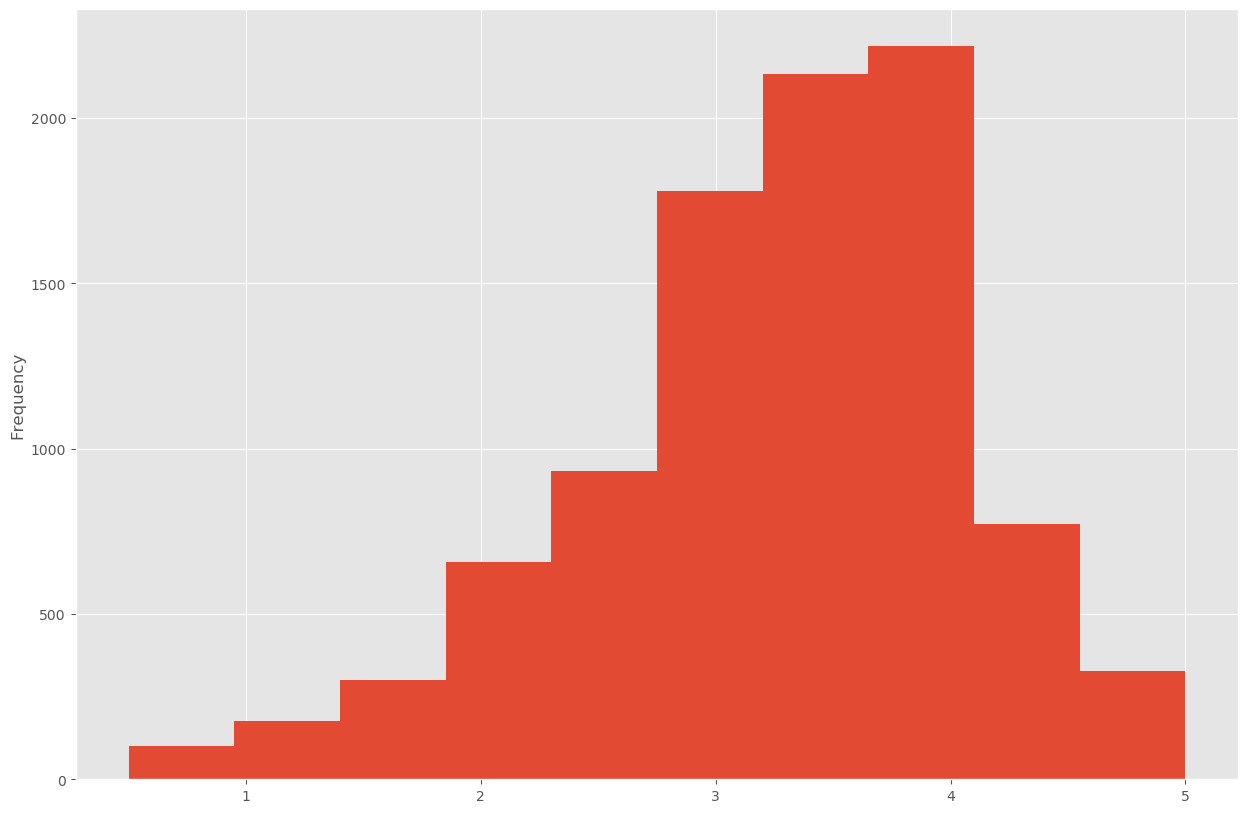

In [64]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).plot(kind='hist', figsize=(15,10))

- Which movie was rated the best? Which movie was rated the worst?
    - ⭐**Bonus**: Filter out movies that have been rated by less than 30 users. Do your results change? Why?

In [65]:
print (df.groupby('title')['rating'].mean().sort_values(ascending=False).head(1))
print (df.groupby('title')['rating'].mean().sort_values(ascending=False).tail(1))

title
My Love    5.0
Name: rating, dtype: float64
title
Follow Me, Boys!    0.5
Name: rating, dtype: float64


In [66]:
print(df.groupby('title')['rating'].mean().sort_values(ascending=False).loc[df.groupby('title')['rating'].count() > 30].head(1))
print(df.groupby('title')['rating'].mean().sort_values(ascending=False).loc[df.groupby('title')['rating'].count() > 30].tail(1))

title
Shawshank Redemption, The    4.429022
Name: rating, dtype: float64
title
I Know What You Did Last Summer    2.109375
Name: rating, dtype: float64


- ⭐**Bonus**: Did the average rating of movies improve over time? 

    - Use the `year` that you have extracted in a previous ⭐bonus exercises
    - Visualize your findings in a nice plot
    - Post your plot in slack!

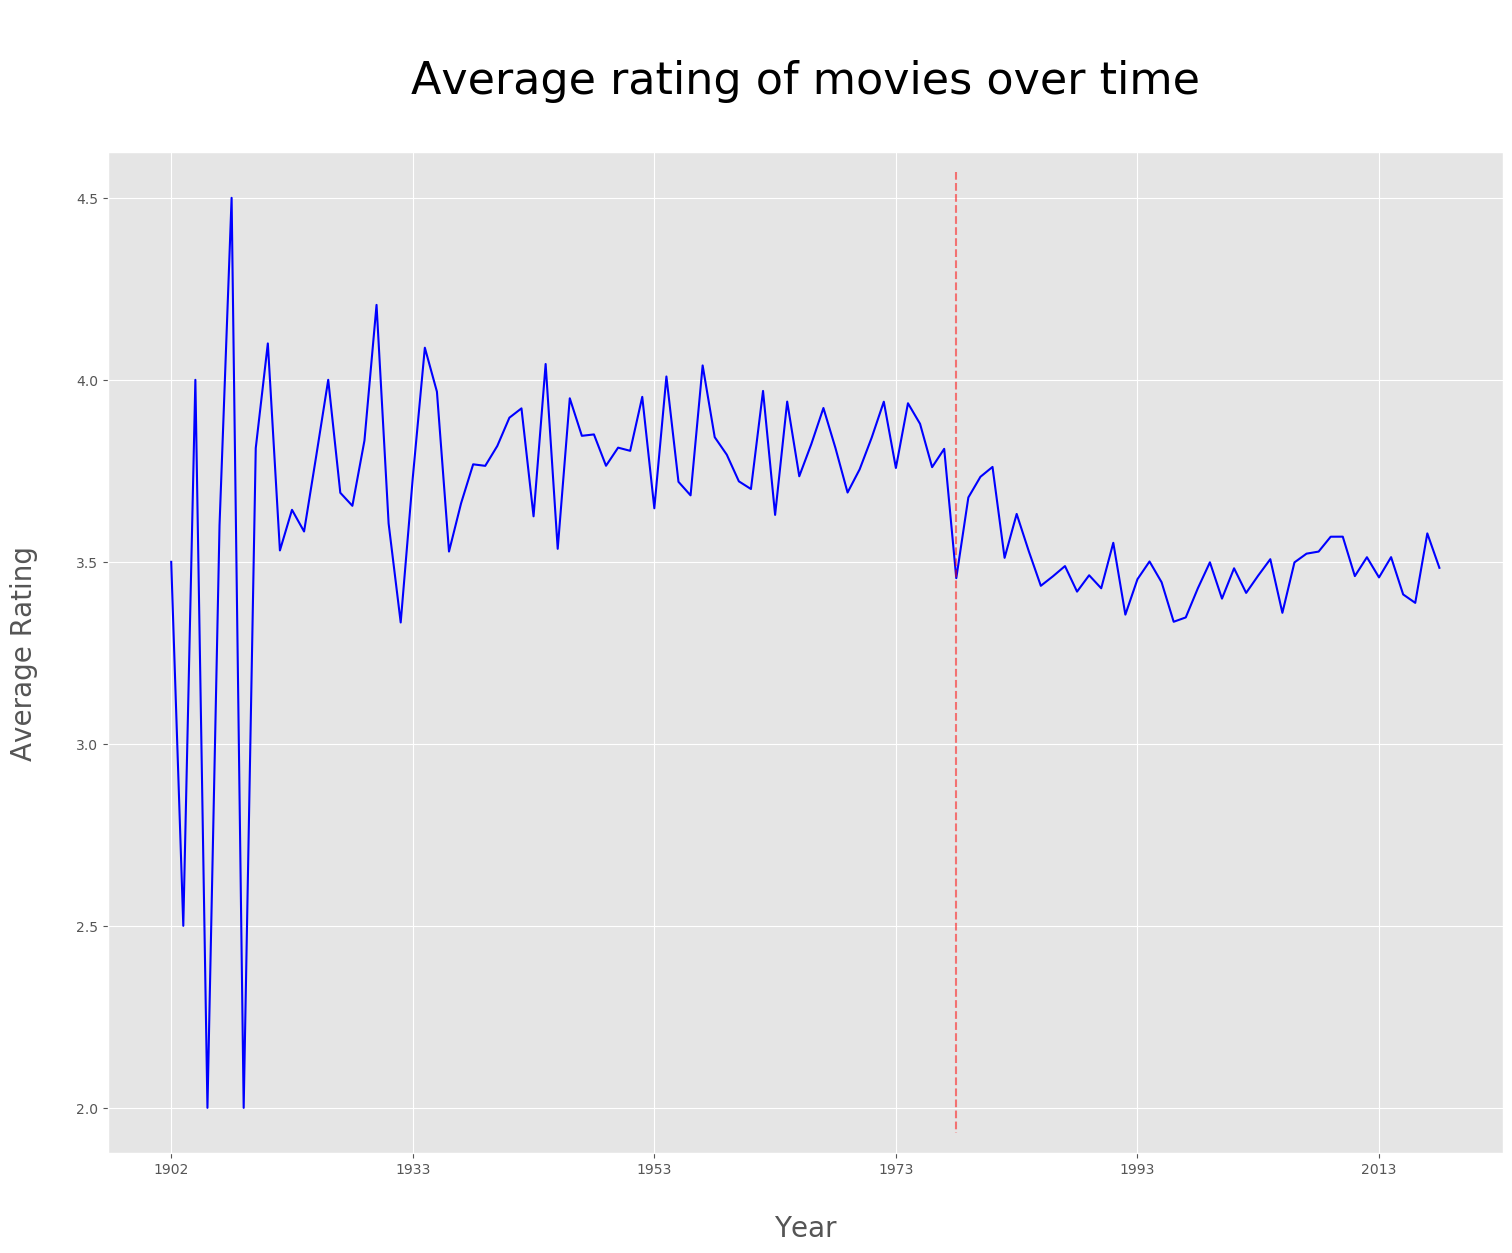

In [67]:
df.groupby('year')['rating'].mean().plot(kind='line', figsize=(18,13), color="blue")
plt.title('\nAverage rating of movies over time\n', fontsize=32)
line1 = plt.axvline(65, 0.98,0.02, color='red', linestyle="--", alpha=0.5)
plt.xlabel('\nYear', fontsize=20)
plt.ylabel('Average Rating\n', fontsize=20)
plt.savefig('avg_rating_over_time.jpg');